### **ECS7022P: Computational Creativity Assignment: Image Generation Using Generative Deep Learning. Mathematical beauty.** 

The following code accompanies the assignment report submitted. It is split in to 2 parts. The generation of the dataset and the implementation of the GAN. All the cells have to be run in order unless the cells commented out (#). The code of the GAN is based on the lab material presented in this module. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### **PART 1: CREATION OF THE DATASET:**


1) DEFINING FUNCTIONS FOR LATER USE IN CODE:

In [2]:
# Functions to make the equations:        
def equation_1(discr, a,b,s,t):
    return  np.array([[(np.sin(s*(x-a)**2 - t*(y-b)**2))for y in discr] for x in discr])  #Class 1
     

def equation_2(discr, a,b,s,t):    
    return np.array([[(np.sin(s*(x-a)**2 + t*(y-b)**2)**2)for y in discr] for x in discr])  #Class 2

def equation_3(discr, a,b,s,t):
    return np.array([[np.sin(s*((x-a)**2 + (y-b)**2))**2 - np.cos(t*((x-a)**2 - (y-b)**2))for y in discr] for x in discr]) #Class 3

def equation_4(discr, a,b,s,t):
    return np.array([[(np.cos(s*(x-a)) + np.sin(t*(y-b))) for y in discr] for x in discr])    #Class 4

        
def equation_to_df(equation, m, save_as_csv, name_df, clas): #Function to make the equations into a dataframe.
    
    #lists for saving the arrays:
    lst_pic = []
    lst_class = []
    lst_a = []
    lst_b = []
    lst_s = []
    lst_t = []


    for i in range(0,m):

        pic =  equation(discr, a[i], b[i], s[i], t[i])  

        lst_pic.append(pic)
        lst_class.append(clas)
        lst_a.append(a[i])
        lst_b.append(b[i])
        lst_s.append(s[i]) 
        lst_t.append(t[i])    
        

    #creating a 3d array holding the generated images along the axis = 0:    
    arr_pic = np.array(lst_pic) 
    print(arr_pic.shape) 


    #storage of the lists in a pandas table
    df = pandas_params(lst_pic, lst_class, lst_a, lst_b, lst_s, lst_t)
    
    if save_as_csv:
        df.to_csv(name_df)
   
    return df, arr_pic

def get_date(): #Helper function for saving the dataframe.
    """
    get the todays date
    :return:  todays date (string)
    """
    from datetime import date
    today = str(date.today())

    return today

def subdirectory(current, new): #Helper function for saving the dataframe.
    """
    :param new:     name of the new subdirectory of the current one, a new one is only created, if it does not
                    already exist
    """

    script_dir = os.path.dirname('current')
    new_dir = os.path.join(script_dir, new + '/')

    if not os.path.isdir(new_dir):
        os.makedirs(new_dir)


def plot_function(df, name_df, file, save_plot, color): #Function to plot the images:
    
    #images (column 'pic' in table) --> 3d array 
    arr_pic = column_to_array(df, string = 'pic') 

    #classes, lables (column 'class' in table--> 1d array
    arr_class = column_to_array(df, string = 'class')   

    #param a:
    arr_a = column_to_array(df, string = 'a')
    #param b:
    arr_b = column_to_array(df, string = 'b')
    #param s:
    arr_s = column_to_array(df, string = 's')
    #param t:
    arr_t = column_to_array(df, string = 't')
    
    #extract indices of rows as a list
    lst_index =  df.index.tolist()
    
    
    for i in range (len(lst_index)):
    
         #title defintion depending on class
        if arr_class[i] == 1:
            title = 'circle, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i], 
                                                                          np.round(arr_a[i], 2), 
                                                                          np.round(arr_b[i], 2),
                                                                          np.round(arr_s[i], 2),
                                                                          np.round(arr_t[i], 2))
        elif arr_class[i] == 2:
            title = 'circle squared, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i],
                                                                                  np.round(arr_a[i], 2), 
                                                                                  np.round(arr_b[i], 2),
                                                                                  np.round(arr_s[i], 2),
                                                                                  np.round(arr_t[i], 2))
        elif arr_class[i] == 3:
            title = 'lemniscate, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i], 
                                                                              np.round(arr_a[i], 2), 
                                                                              np.round(arr_b[i], 2),
                                                                              np.round(arr_s[i], 2),
                                                                              np.round(arr_t[i], 2))
        elif arr_class[i] == 4:
            title = 'sin cos, index {}\na: {}, b: {}, s: {}, t: {}'.format(lst_index[i], 
                                                                           np.round(arr_a[i], 2), 
                                                                           np.round(arr_b[i], 2),
                                                                           np.round(arr_s[i], 2),
                                                                           np.round(arr_t[i], 2))                                                                  

        fig, ax = plt.subplots(ncols=1,  figsize=(16 ,4))

        pos1 = ax.imshow(arr_pic[i],color)
        ax.set_title(title)
        fig.colorbar(pos1, ax=ax)
        
        if save_plot:
            # create new subdirectory name. Function "subdirectory" creates that subdirectory if it does not already exist.
            new = 'plots random samples '
            subdirectory(file, new)
            plt.savefig(new + '/{}_{}_{}.png'.format(get_date(), name_df, lst_index[i], bbox_inches="tight"))
            

    return fig


def plot_function_4(lst_pic, lst_title, lst_color):
    fig, ax = plt.subplots(ncols=4,  figsize=(16 ,4))
    
    for i in range(4):
        pos1 = ax[i].imshow(lst_pic[i], lst_color[i])
        ax[i].set_title(lst_title[i])
        fig.colorbar(pos1, ax=ax[i])
        
    return fig  


def pandas(lst_pic, lst_class):

    data = {'pic': lst_pic, 'class': lst_class}
    df = pd.DataFrame(data=data)
    
    return df 


def pandas_params(lst_pic, lst_class, lst_a, lst_b, lst_s, lst_t ):

    data = {'pic': lst_pic,
            'class': lst_class,
            'a': lst_a,
            'b': lst_b,
            's': lst_s,
            't': lst_t,}
    
    df = pd.DataFrame(data=data)
    
    return df 


def column_to_array(df, string): #Function to make a column of the dataframe to an array.
    
    #extract colon 'pic' as an array 
    arr = df[[string]].to_numpy()
    
    #fill the elements (2d arrays of selected images) in a list and transform the list in to an array.    
    lst = []
    for item in arr:
        lst.append(item[0])

    arr= np.array(lst)  
    
    return arr

1) DEFINITIION OF THE "CANVAS".

In [3]:
#Definition of the "canvas" 

#number of pixels in one dimension, total nunber of pixels is (n_pix_x)^2.
n_pix_x = 64       

#returns n_pix_x equally spaced samples in the intervall:
discr = np.linspace(0, 19, n_pix_x) 

2: DEFINITION OF THE BASIC FUNCTIONS f(x,y): (Just for illustration purpose. No patameters used.) 


In [4]:
# 4 equations: (Without parameters) Generation of basic images. 

#Class 1:
pic1 = np.array([[(np.sin(x**2 - y**2))for y in discr] for x in discr]) 

#Class 2:
pic2 = np.array([[(np.sin(x**2 + y**2)**2)for y in discr] for x in discr])

#Class 3:
pic3 = np.array([[np.sin((x)**2 + (y)**2)**2 - np.cos(1*((x)**2 - (y)**2))for y in discr] for x in discr])

#Class 4:
pic4 = np.array([[(np.cos(x) + np.sin(y)) for y in discr] for x in discr]) 


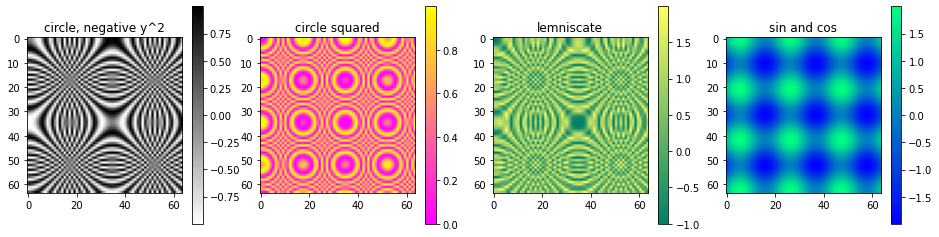

In [5]:
# Plot of the 4 defined functions on the "canvas".

lst_pic = [pic1, pic2, pic3, pic4]
lst_title = ['circle, negative y^2', 'circle squared', 'lemniscate', 'sin and cos']
lst_color = ['binary', 'spring', 'summer', 'winter']

fig = plot_function_4(lst_pic, lst_title, lst_color)

3) PARAMETERISATION OF THE FUNCTIONS TO GENERATE DIFFERENT IMAGES. (a,b,s,t)

Two kinds of parameters: 

1) Additive parameters a and b where a and b can take values x and {x∈ℝ: -m ≤ x ≤ m}.

2) Multiplicative parameters s and t where s and t can take values x and {x∈ℝ: 0 < x ≤ m }.

m = parameter range where m ∈ ℤ.

In each of the following cells the parameter settings for a function are defined. Each function has several different combinations of parameter settings hence several cells are needed for each function class. Each cell generates 200 images as m (parameter range) was set to 200. 


This is achieved with the following method: 


Parameters a,b,s and t can either be "silenced" (have no influence) or "running" (change by a defined increment from one to the next image within the parameter range m). 


To "silence" a parameter the additive parameters have to be set to 0 and the multiplicative ones to 1. (Adding 0 to x equals x and multiplying x by 1 equals x). If all parameters in one cell are "silenced" it will produce 200 same images of the original kind of the function class used in the cell.


"Running" parameters are defined by specifying an increment according to which the parameter is calculated. 


Example: If for a particular function the parameter t is chosen to be “running”, its increment is chosen to be 1 and m is defined to be 10 then parameter t will be able to take values {0,1,2,3,4,5,6,7,8,9,10}. Assuming the other 3 parameters are also defined by selecting their state (silenced/running) 10 different images from that function class can be created. 


All information (The images (x,y values), the function class and the parameters used to generate the image) are stored. The dataframes can be saved as csv files for a potential expansion of this project where this data is needed.


In [6]:
#Definition of the parameter range, how many samples of images are generated with this parameter setting:
m = 200

CLASS 1: 

In [7]:
#PARAMERER SETTING 1:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)


#3a9: Printing of the selected parameters:
#print('a: {}'. format(a))
#print('b: {}'. format(b))
#print('s: {}'. format(s))
#print('t: {}'. format(t))

save_as_csv = False
name_df = 'df1_1'

dfNEGCIRCLE1, arr_NEGCIRCLE1 = equation_to_df(equation_1, m, save_as_csv, name_df, clas=1)

dfNEGCIRCLE1.head()

(200, 64, 64)


pic  class    a    b    s  \
0  [[0.0, -0.09082954381780853, -0.35584640815821...      1  0.0  0.0  1.0   
1  [[0.0, -0.09082954381780853, -0.35584640815821...      1  0.0  0.0  1.0   
2  [[0.0, -0.09082954381780853, -0.35584640815821...      1  0.0  0.0  1.0   
3  [[0.0, -0.09082954381780853, -0.35584640815821...      1  0.0  0.0  1.0   
4  [[0.0, -0.09082954381780853, -0.35584640815821...      1  0.0  0.0  1.0   

     t  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0

In [8]:
#PARAMERER SETTING 2:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])


save_as_csv = False
name_df = 'df1_2'

dfNEGCIRCLE2, arr_NEGCIRCLE2 = equation_to_df(equation_1, m, save_as_csv, name_df, clas=1)

#dfNEGCIRCLE2.head()

(200, 64, 64)


In [9]:
#PARAMERER SETTING 3:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_incr = 1.0
s = np.array([(x * t_incr) for x in range(1, m+1)])
t_int = 1
t = (np.ones(m) * s_int)


save_as_csv = False
name_df = 'df1_3'

dfNEGCIRCLE3, arr_NEGCIRCLE3 = equation_to_df(equation_1, m, save_as_csv, name_df, clas=1)

#dfNEGCIRCLE3.head()

(200, 64, 64)


In [10]:
#PARAMERER SETTING 4:

a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])
b_incr = 0.6
b = np.array([(x * b_incr) for x in range(0, m)])
s_incr = 1.0
s = np.array([(x * t_incr) for x in range(1, m+1)])
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])

save_as_csv = False
name_df = 'df1_4'

dfNEGCIRCLE4, arr_NEGCIRCLE4 = equation_to_df(equation_1, m, save_as_csv, name_df, clas=1)

dfNEGCIRCLE4.head()

(200, 64, 64)


pic  class    a    b    s  \
0  [[0.0, -0.09082954381780853, -0.35584640815821...      1 -0.0  0.0  1.0   
1  [[0.5311861979208836, 0.8920674583010817, 0.95...      1 -0.8  0.6  2.0   
2  [[-0.21667508038738093, -0.8545176166995763, 0...      1 -1.6  1.2  3.0   
3  [[-0.6093353160635679, 0.9969494506494244, -0....      1 -2.4  1.8  4.0   
4  [[-0.3975556831214459, -0.7888815201736586, -0...      1 -3.2  2.4  5.0   

     t  
0  1.0  
1  2.0  
2  3.0  
3  4.0  
4  5.0

In [11]:
#PARAMERER SETTING 5:
a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])
b_incr = 0.6
b = np.array([(x * b_incr) for x in range(0, m)])
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)

save_as_csv = False
name_df = 'df1_5'

dfNEGCIRCLE5, arr_NEGCIRCLE5 = equation_to_df(equation_1, m, save_as_csv, name_df, clas=1)

dfNEGCIRCLE5.head()

(200, 64, 64)


pic  class    a    b    s  \
0  [[0.0, -0.09082954381780853, -0.35584640815821...      1 -0.0  0.0  1.0   
1  [[0.2763556485641139, 0.5234967731733681, 0.59...      1 -0.8  0.6  1.0   
2  [[0.9001004421765052, 0.9834731130297085, 0.80...      1 -1.6  1.2  1.0   
3  [[0.5823306495240801, -0.3645660443674463, -0....      1 -2.4  1.8  1.0   
4  [[-0.9731189832251742, -0.4318303970224525, 0....      1 -3.2  2.4  1.0   

     t  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0

CLASS 2:

In [12]:
#PARAMETER SETTING 1
a_int = 0
a = (np.ones(m) * a_int)
s_int = 1
s = (np.ones(m) * s_int)
b_int = 0
b = (np.ones(m) * b_int)
t_int = 1
t = (np.ones(m) * t_int)


save_as_csv = False
name_df = 'df2_1'

dfCIRCLESQ1, arr_CIRCLESQ1 = equation_to_df(equation_2, m, save_as_csv, name_df, clas=2)

#dfCIRCLESQ_2.head()

(200, 64, 64)


In [13]:
#PARAMETER SETTING 2
a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])
b_incr = 0.6
b = np.array([(x * b_incr) for x in range(0, m)])
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)


save_as_csv = False
name_df = 'df2_2'

dfCIRCLESQ2, arr_CIRCLESQ2 = equation_to_df(equation_2, m, save_as_csv, name_df, clas=2)

#dfCIRCLESQ_2.head()

(200, 64, 64)


In [14]:
#PARAMETER SETTING 3
a_int = 0
a = (np.ones(m) * a_int)
b_incr = 0.6
b = np.array([(x * b_incr) for x in range(0, m)])
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)

save_as_csv = False
name_df = 'df2_3'

dfCIRCLESQ3, arr_CIRCLESQ3 = equation_to_df(equation_2, m, save_as_csv, name_df, clas=2)

#dfCIRCLESQ_2.head()

(200, 64, 64)


In [15]:
#PARAMETER SETTING 4

a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)


save_as_csv = False
name_df = 'df2_4'

dfCIRCLESQ4, arr_CIRCLESQ4 = equation_to_df(equation_2, m, save_as_csv, name_df, clas=2)

#dfCIRCLESQ_2.head()

(200, 64, 64)


In [16]:
#PARAMETER SETTING 5

a_int = 0
a = (np.ones(m) * a_int)
b_incr = 0.4
b = np.array([(x * b_incr) for x in range(0, m)])
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)


save_as_csv = False
name_df = 'df_5'

dfCIRCLESQ5, arr_CIRCLESQ5 = equation_to_df(equation_2, m, save_as_csv, name_df, clas=2)

#dfCIRCLESQ_2.head()

(200, 64, 64)


CLASS 3:


In [17]:
#PARAMERER SETTING 1:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)


#Printing of the selected parameters:
#print('a: {}'. format(a))
#print('b: {}'. format(b))
#print('s: {}'. format(s))
#print('t: {}'. format(t))

save_as_csv = False
name_df = 'df3_1'

dfLEMN1, arr_LEM1 = equation_to_df(equation_3, m, save_as_csv, name_df, clas=2)

#dfCIRCLESQ_2.head()

(200, 64, 64)


In [18]:
#PARAMERER SETTING 2:

a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])
b_incr = 0.6
b = np.array([(x * b_incr) for x in range(0, m)])
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)

save_as_csv = False
name_df = 'df3_2'

dfLEMN2, arr_LEM2 = equation_to_df(equation_3, m, save_as_csv, name_df, clas=3)

(200, 64, 64)


In [19]:
#PARAMERER SETTING 3:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])

save_as_csv = False
name_df = 'df3_3'

dfLEMN3, arr_LEM3 = equation_to_df(equation_3, m, save_as_csv, name_df, clas=3)


(200, 64, 64)


In [20]:
#PARAMERER SETTING 4:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_incr = 0.2
s = np.array([(x * s_incr) for x in range(1, m+1)])
t_int = 1
t = (np.ones(m) * t_int)

save_as_csv = False
name_df = 'df3_4'

dfLEMN4, arr_LEM4 = equation_to_df(equation_3, m, save_as_csv, name_df, clas=3)

(200, 64, 64)


CLASS 4: 

In [21]:
#PARAMETER SETTING 1:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_int = 1
t = (np.ones(m) * t_int)



save_as_csv = False
name_df = 'df4_1'

dfTRIG1, arr_TRIG1 = equation_to_df(equation_4, m, save_as_csv, name_df, clas=4)

#dfTRIG1.head()

(200, 64, 64)


In [22]:
#PARAMERER SETTING 2:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_incr = 0.2
s = np.array([(x * s_incr) for x in range(1, m+1)])
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])

save_as_csv = False
name_df = 'df4_2'
dfTRIG2, arr_TRIG2 = equation_to_df(equation_4, m, save_as_csv, name_df, clas=4)

(200, 64, 64)


In [23]:
#PARAMERER SETTING 3:

a_int = 0
a = (np.ones(m) * a_int)
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])

save_as_csv = False
name_df = 'df4_3'
dfTRIG3, arr_TRIG3 = equation_to_df(equation_4, m, save_as_csv, name_df, clas=4)

(200, 64, 64)


In [24]:
#PARAMERER SETTING 4:
a_incr = - 0.8
a = np.array([(x * a_incr) for x in range(0, m)])
b_int = 0
b = (np.ones(m) * b_int)
s_int = 1
s = (np.ones(m) * s_int)
t_incr = 1.0
t = np.array([(x * t_incr) for x in range(1, m+1)])


save_as_csv = False
name_df = 'df4_4'
dfTRIG4, arr_TRIG4 = equation_to_df(equation_4, m, save_as_csv, name_df, clas=4)

(200, 64, 64)


In [25]:
#CREATE A LARGE DATAFTAME CONTAINING ALL THE ABOVE MADE IMAGES:

df_total = pd.concat([dfLEMN1, dfLEMN2, dfLEMN3, dfLEMN4, dfCIRCLESQ1, dfCIRCLESQ2, dfCIRCLESQ3, dfCIRCLESQ4, dfCIRCLESQ5,dfTRIG1, dfTRIG2,dfTRIG3, dfTRIG4, dfNEGCIRCLE1, dfNEGCIRCLE2, dfNEGCIRCLE3, dfNEGCIRCLE4, dfNEGCIRCLE5 ], axis=0, ignore_index=True)
df_total.head()
#print(df_total)


pic  class    a    b    s  \
0  [[-1.0, -0.9876164478530232, -0.80791778635566...      2  0.0  0.0  1.0   
1  [[-1.0, -0.9876164478530232, -0.80791778635566...      2  0.0  0.0  1.0   
2  [[-1.0, -0.9876164478530232, -0.80791778635566...      2  0.0  0.0  1.0   
3  [[-1.0, -0.9876164478530232, -0.80791778635566...      2  0.0  0.0  1.0   
4  [[-1.0, -0.9876164478530232, -0.80791778635566...      2  0.0  0.0  1.0   

     t  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0

In [26]:
# Scramble the new large table. (Not crucial as tensorflow has a shuffle method)

df_total_scrambled = df_total.sample(frac=1.0, replace=False, random_state=1)
df_total_scrambled.head()

#save as csv file:
#df_total_scrambled.to_csv('df_total_scrambled')

#print(df_total_scrambled)

pic  class     a     b  \
280   [[0.021436020338937323, -0.30348557108033936, ...      3 -64.0  48.0   
563   [[-1.0, 0.7111288826485979, 1.126342370867028,...      3   0.0   0.0   
2185  [[1.0, 0.5619487942567074, 0.21242771836183216...      4   0.0   0.0   
613   [[-1.0, -0.9323978966020863, -0.20962120950343...      3   0.0   0.0   
2748  [[0.0, -0.09082954381780853, -0.35584640815821...      1   0.0   0.0   

         s      t  
280    1.0    1.0  
563    1.0  164.0  
2185  37.2  186.0  
613    2.8    1.0  
2748   1.0    1.0

3) EXTRACTION OF THE ARRAY CONTAINING ALL IMAGES:

In [27]:
#Extract specific columns and transform the colunms to arrays to use in GAN. Classes and indicies can be used for future work.

#images (column 'pic' in table) to 3d array:
#arr_total = column_to_array(df_total, string = 'pic')
#print(arr_total.shape)
#print(arr_total)

#images from scrambled table (column 'pic' in table) to 3d array:
arr_total = column_to_array(df_total_scrambled, string = 'pic')
print(arr_total.shape)
#print(arr_total)


#classes (column 'class' in table) to 1d array:
arr_class = column_to_array(df_total_scrambled, string = 'class')
#print(arr_class)


#extract indices of rows as a list:
lst_index =  df_total_scrambled.index.tolist()
#print(lst_index)

(3600, 64, 64)


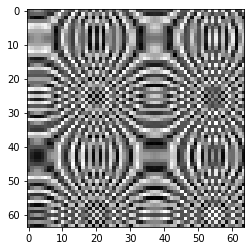

In [28]:
#Print one image of choice for a sanity check:
img = arr_total[1112]
plt.imshow(img, 'binary')


In [29]:
#Normalisation of the data for the values to be in the range of 0-1. 

arr_normalized= (arr_total - np.min(arr_total))/np.ptp(arr_total)

print(np.min(arr_normalized))
print(np.max(arr_normalized))
print(arr_normalized.shape)

0.0
1.0
(3600, 64, 64)


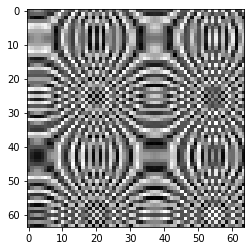

In [30]:
#Second sanity check:
img = arr_normalized[1112]
plt.imshow(img, 'binary')

4) PLOTTING OF IMAGES IN DATASET. ONLY RUN THIS CELL IF WILLING TO PRINT 3600 IMAGES. THIS HAS BEEN DONE WITH A SMALLER VERSION OF THE DATASET TO GET A SAMPLE OF THE IMAGES.

In [31]:
#WARNING: Only run this cell if one is willing to print 3600 images. The output below is merely an extract of the final dataset. 

#name_df = '100_Pix'
#save_plot = False
#file = 'CC'

#fig = plot_function(df_total, name_df, file, save_plot, color = 'summer') 

5) 1 CHANNEL TO 3 CHANNEL:

In [ ]:
#Creating 2 additional channels. This will produce green images. 

dim = np.zeros((3600, 64, 64))
Final_array = np.stack((dim, arr_normalized, dim), axis=3)
print(Final_array.shape)


(3600, 64, 64, 3)


### **PART 2: GENERATIVE ADVERSARIAL NETWORK:**

The following code produces the final GAN architecture used. This was the result of an experimental study (to find the optimal hyper-parameters and settings) which is described in the assignment report submitted. The structure is an adaptation of the code provided in the lab materials. 

In [ ]:
import tensorflow as tf

import numpy as np
from tqdm.autonotebook import tqdm
from IPython import display



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


1) DISPLAY IMAGES NOW IN 3 CHANNEL GREEN DOMINATED FORMAT:

In [ ]:
def show_images(images):
    if len(images.shape) > 3 and images.shape[3] == 1:
        if tf.is_tensor(images):
            images = images.numpy()
        images = np.squeeze(images, axis=3)

    num_images = len(images)
    fig, cells = plt.subplots(ncols=num_images, nrows=1, figsize=(2 * num_images, 2))
    for cell_num in range(num_images):
        cells[cell_num].matshow(images[cell_num])
        cells[cell_num].axis('off')
    plt.show()

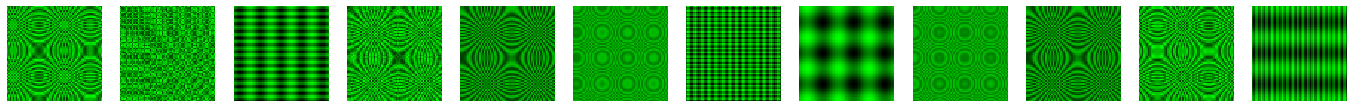

In [ ]:
#Display some of the images:

n_images =  12 
images_display = Final_array
if n_images > 0:
    images_display = images_display[:n_images]

show_images(images_display)

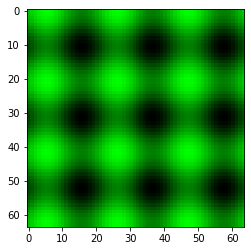

In [ ]:
#Inspect one image closer:
plt.imshow(images_display[7])

In [ ]:
#Dataset parameters:

BATCH_SIZE = 40 
N_CHANNELS = (Final_array.shape[-1] if len(Final_array.shape)>3 else 1)
TRAIN_BUF = len(Final_array)
IMG_SIZE = len(Final_array[0])
DIMS = (IMG_SIZE, IMG_SIZE, N_CHANNELS)
N_TRAIN_BATCHES = int(TRAIN_BUF/BATCH_SIZE)

print("Batch size: {} \nTraining set size: {} \nImage Dimensions: {} \n# Train batches: {}".format( BATCH_SIZE, TRAIN_BUF, DIMS, N_TRAIN_BATCHES))

Batch size: 40 
Training set size: 3600 
Image Dimensions: (64, 64, 3) 
# Train batches: 90


2) PREPARE TENSORS:

In [ ]:
#Reshape array:
train_images = Final_array.reshape(Final_array.shape[0], IMG_SIZE, IMG_SIZE, N_CHANNELS).astype("float32")

In [ ]:
#Making input tensors:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images).shuffle(TRAIN_BUF).batch(BATCH_SIZE))

3) GENERATOR NETWORK:

In [ ]:
#Activation functions:
activation_l0 = "relu" 
activation_l2 = "relu" 
activation_l3 = "relu" 
activation_l4 = "tanh" 

n_stride = 2  # factor to scale image up by in each convolution layer.
n_layers_stride = 2  # number of layers scaling the image up
n_smallest_dim = IMG_SIZE//(n_stride*n_layers_stride)
seed_size = IMG_SIZE * (2 ** (n_layers_stride-1)) * N_CHANNELS

#5 layers: Dense, Reshape, 3xConvolutionTranspose:
generator = [
    tf.keras.layers.Dense(units=n_smallest_dim * n_smallest_dim * seed_size, activation=activation_l0),
    tf.keras.layers.Reshape(target_shape=(n_smallest_dim, n_smallest_dim, seed_size)),
    tf.keras.layers.Conv2DTranspose(filters=seed_size, kernel_size=3, strides=(n_stride, n_stride), padding="SAME", activation=activation_l2),
    tf.keras.layers.Conv2DTranspose(filters=seed_size/2, kernel_size=3, strides=(n_stride, n_stride), padding="SAME", activation=activation_l3),
    tf.keras.layers.Conv2DTranspose(filters=N_CHANNELS, kernel_size=3, strides=(1, 1), padding="SAME", activation=activation_l4),]

#Optimiser:
opt_learning_rate = 0.0002  
opt_beta = 0.5 
gen_optimizer = tf.keras.optimizers.Adam(opt_learning_rate, beta_1=opt_beta)

# Build the network:
gen = tf.keras.Sequential(generator)
gen.build([train_images.shape[0], 1, 1, seed_size])  # specifies input shape

# Print network summary
gen.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (3600, 1, 1, 98304)       37847040  
                                                                 
 reshape (Reshape)           (3600, 16, 16, 384)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (3600, 32, 32, 384)      1327488   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (3600, 64, 64, 192)      663744    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (3600, 64, 64, 3)        5187      
 ranspose)                                                       
                                                        

4) GENERATOR NETWORK:

In [ ]:
from keras.layers import LeakyReLU

#5 layers, Input + Convolutionx2 + Flatten + Dense
discriminator = [
    tf.keras.layers.InputLayer(input_shape=DIMS),
    tf.keras.layers.Conv2D(filters=seed_size/2, kernel_size=3, strides=(n_stride, n_stride), activation=LeakyReLU(alpha=0.2)),
    tf.keras.layers.Conv2D(filters=seed_size, kernel_size=3, strides=(n_stride, n_stride), activation=LeakyReLU(alpha=0.2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=None),]


#Optimiser:
opt_learning_rate = 0.0001 
disc_optimizer = tf.keras.optimizers.RMSprop(opt_learning_rate)

# Build the network
disc = tf.keras.Sequential(discriminator)
disc.compile(loss='binary_crossentropy', optimizer= disc_optimizer , metrics = ['accuracy']) 
disc.build(DIMS)  # specifies input shape

# Print network summary
disc.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 192)       5376      
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 384)       663936    
                                                                 
 flatten (Flatten)           (None, 86400)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 86401     
                                                                 
Total params: 755,713
Trainable params: 755,713
Non-trainable params: 0
_________________________________________________________________


5) CREATING THE GAN:

In [ ]:
class GAN(tf.keras.Model):
    """ 
    A basic GAN class. Extends tf.keras.Model
    """

    def __init__(self, **kwargs):
        super(GAN, self).__init__()
        self.__dict__.update(kwargs)

        self.gen = self.gen
        self.disc = self.disc

    def call(self, x):
        return self.gen(x)

    def generate(self, z):
        """
        Run input vector z through the generator to create fake data.
        """
        return self.gen(z)

    def discriminate(self, x):
        """
        Run data through the discriminator to label it as real or fake.
        """
        return self.disc(x)

    def compute_loss(self, x):
        """ 
        Passes through the network and computes loss for given data.
        """
        # Generate a random vector seed from a uniform distribution
        seed = tf.random.normal([x.shape[0], 1, 1, self.seed_size])

        # Use the seed to generate a fake data set with the generator network.
        fakes = self.generate(seed)

        # Use the discriminator network to obtain labels for both the generated data (x_gen) and the real data (x)
        logits_reals = self.discriminate(x)
        logits_fakes = self.discriminate(fakes)

        # Discriminator loss, looking at correctly labeled data
        # Losses of the real data with correct label "1"
        disc_real_loss = gan_loss(logits=logits_reals, is_real=True)
        # Losses of the fake data with correct label "0"
        disc_fake_loss = gan_loss(logits=logits_fakes, is_real=False)
        # The discriminator loss is the sum of the 2 previous values
        disc_loss = disc_fake_loss + disc_real_loss

        # Generator loss, looking at the fake data labeled as real ("1")
        gen_loss = gan_loss(logits=logits_fakes, is_real=True)

        # Return losses
        return disc_loss, gen_loss

    def compute_gradients(self, x):
        """ 
        Passes through the network and computes gradients.
        """
        ### Pass x through network and compute losses
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            disc_loss, gen_loss = self.compute_loss(x)

        # Compute gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, self.disc.trainable_variables)

        return gen_gradients, disc_gradients

    def apply_gradients(self, gen_gradients, disc_gradients):
        """
        Apply given gradients to both networks.
        """
        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.gen.trainable_variables))
        self.disc_optimizer.apply_gradients(zip(disc_gradients, self.disc.trainable_variables))

    @tf.function
    def train(self, train_x):
        """
        Train the GAN! 
        """
        gen_gradients, disc_gradients = self.compute_gradients(train_x)
        self.apply_gradients(gen_gradients, disc_gradients)
        
        
def gan_loss(logits, is_real=True):
    """
    Computes cross entropy between logits and labels
    """
    if is_real:
        labels = tf.ones_like(logits)
    else:
        labels = tf.zeros_like(logits)

    # Returns loss calculation
    return tf.nn.sigmoid_cross_entropy_with_logits(labels, logits)


# Set up the model

model = GAN(gen = gen, disc = disc, gen_optimizer = gen_optimizer, disc_optimizer = disc_optimizer, seed_size = seed_size)

6) TRAINING THE GAN:

Running this cell with 180 epochs will take 30 minutes when connected to a GPU.

Epoch: 179 | disc_loss: 1.3009147644042969| gen_loss: 1.3009147644042969
Epoch: 179


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

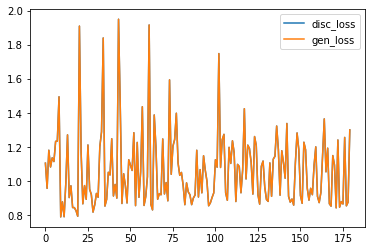

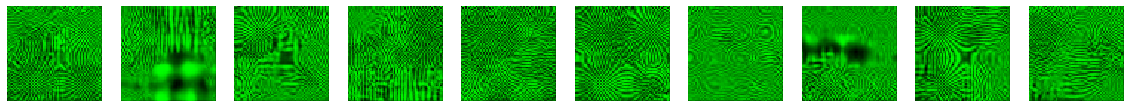

In [ ]:
#TRAINING:
n_epochs =  180

losses = pd.DataFrame(columns = ['disc_loss','gen_loss']) 

for epoch in range(n_epochs):

    # Train the model
    for batch, train_x in tqdm(zip(range(N_TRAIN_BATCHES), train_dataset), total=N_TRAIN_BATCHES):
        model.train(train_x)

    
    loss = []
    for batch in tqdm(range(N_TRAIN_BATCHES), total=N_TRAIN_BATCHES):
         loss.append(model.compute_loss(train_x))
         print(np.mean(loss))
    losses.loc[len(losses)] = np.mean(loss)
    losses.plot()

    # Display epoch and images generate at this point in training
    display.clear_output()  # This line clears output between epochs
    print( "Epoch: {} | disc_loss: {}| gen_loss: {}".format(epoch, losses.disc_loss.values[-1], losses.gen_loss.values[-1])) 
    print("Epoch: {}".format(epoch))
    generated_images = model.gen(tf.random.normal(shape=(10, seed_size)))
    show_images(generated_images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


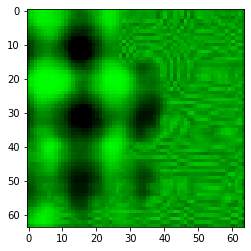

In [ ]:
plt.imshow(generated_images[6])


7) GENERATE OUTPUT IMAGES WITH A RANDOM NOISE VECTOR:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

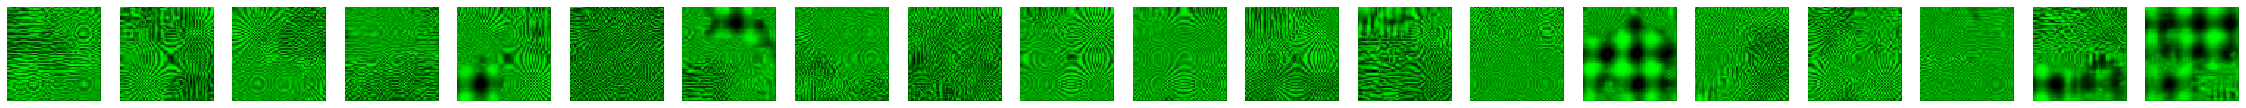

In [ ]:
#Running with random input to generate images
samples = model.predict(tf.random.normal(shape=(20, 1, 1, seed_size)))
show_images(samples)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


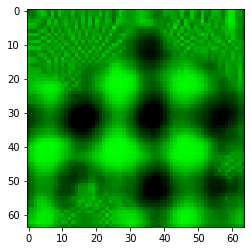

In [ ]:
# INSPECT ONE IMAGE CLOSER:
plt.imshow(samples[14])

In [ ]:
#print(samples)
print(samples.shape)
print(samples[14].shape)

(20, 64, 64, 3)
(64, 64, 3)


In [ ]:
# INSPECT THE TENSOR:
print(samples[14])

[[[-4.97231726e-04  3.93446386e-01  1.33168185e-03]
  [ 4.07623971e-04  4.55106348e-01 -1.19357152e-04]
  [-6.35634526e-04  5.36413312e-01 -7.20433949e-04]
  ...
  [-4.35063848e-03  6.43831074e-01 -1.14636379e-03]
  [-1.58594441e-04  5.72837353e-01 -2.75010476e-04]
  [-1.06054114e-03  4.60922092e-01  4.03428625e-04]]

 [[-1.67123275e-03  4.45026189e-01  7.93958199e-04]
  [-2.43163947e-03  4.56357569e-01  2.49053206e-04]
  [ 9.74905328e-04  5.14366269e-01  6.52960502e-04]
  ...
  [ 7.89908634e-04  5.96969604e-01  2.53584818e-03]
  [-8.00677110e-04  6.25549018e-01 -3.45906522e-03]
  [-1.07216078e-03  4.93390203e-01 -1.88785838e-04]]

 [[-1.26218438e-04  5.61171114e-01  6.75685878e-05]
  [-5.33488696e-04  5.04252315e-01  3.13279015e-04]
  [-8.28853517e-04  5.50468564e-01 -1.14770920e-03]
  ...
  [-1.14392582e-03  5.85568309e-01 -8.94793018e-04]
  [ 8.88375915e-04  5.85979521e-01 -5.08838857e-05]
  [-1.51764276e-03  4.61349964e-01  2.29469710e-03]]

 ...

 [[-1.52863702e-03  6.63201153e-01